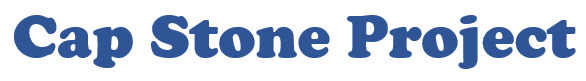

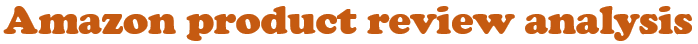

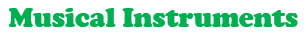

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the data set of Musical Instruments

## Import all the necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import string
import re
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans,DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from nltk.sentiment import SentimentIntensityAnalyzer 
from tqdm.notebook import tqdm



import warnings
warnings.filterwarnings('ignore')

import nltk
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('vader_lexicon') # To predict the sentiments based on the text

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Load the Review of Musical Instruments

In [3]:
musical_df = pd.read_json('/content/drive/MyDrive/Musical_Instruments.json.gz', lines=True ,nrows=200000)

Load the meta dataset of Musical Instruments

In [4]:
meta_musical_df = pd.read_json('/content/drive/MyDrive/meta_Musical_Instruments.json.gz', lines=True,nrows=200000 )

Merging both reviews dataset and meta dataset of Musical Instruments:

In [5]:
final_music=pd.merge(musical_df,meta_musical_df,on='asin')

Data Preprocessing

In [6]:
# Checking the first five records 
final_music.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,5,90.0,False,"08 9, 2004",AXHY24HWOF184,0470536454,{'Format:': ' Paperback'},Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,...,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"[>#76,268 in Arts, Crafts &amp; Sewing (See To...","[1119287111, 156477998X, 0470045558, 190870724...","Arts, Crafts &amp; Sewing",,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,4,2.0,True,"04 6, 2017",A29OWR79AM796H,0470536454,{'Format:': ' Hardcover'},Amazon Customer,Very helpful...,Four Stars,...,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"[>#76,268 in Arts, Crafts &amp; Sewing (See To...","[1119287111, 156477998X, 0470045558, 190870724...","Arts, Crafts &amp; Sewing",,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,5,NaN,True,"03 14, 2017",AUPWU27A7X5F6,0470536454,{'Format:': ' Paperback'},Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,...,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"[>#76,268 in Arts, Crafts &amp; Sewing (See To...","[1119287111, 156477998X, 0470045558, 190870724...","Arts, Crafts &amp; Sewing",,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
3,4,NaN,True,"02 14, 2017",A1N69A47D4JO6K,0470536454,{'Format:': ' Paperback'},Christopher Burnett,My girlfriend use quite often,Four Stars,...,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"[>#76,268 in Arts, Crafts &amp; Sewing (See To...","[1119287111, 156477998X, 0470045558, 190870724...","Arts, Crafts &amp; Sewing",,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,5,NaN,True,"01 29, 2017",AHTIQUMVCGBFJ,0470536454,{'Format:': ' Paperback'},Amazon Customer,Arrived as described. Very happy.,Very happy.,...,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"[>#76,268 in Arts, Crafts &amp; Sewing (See To...","[1119287111, 156477998X, 0470045558, 190870724...","Arts, Crafts &amp; Sewing",,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [7]:
#Checking the last five Records
final_music.tail()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
376471,3,6.0,False,"10 27, 2010",A3LO69NVX14T5O,B0007L9NS2,NaN,I. Pribadi,Product works like decribed but does require s...,Okay product but will look for others,...,"[One quick and easy application, 8 fl. Oz/250 ...","[>#1,003 in Musical Instruments (See Top 100 i...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",,$13.30,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
376472,5,18.0,True,"03 26, 2010",A23BA3FL30O87V,B0007L9NS2,NaN,Andrew Williams,Product works very well. I have Zildjian A Cu...,"Clean, bright cymbals!",...,"[One quick and easy application, 8 fl. Oz/250 ...","[>#1,003 in Musical Instruments (See Top 100 i...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",,$13.30,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
376473,5,7.0,True,"06 21, 2009",AC6ZMS9HZ23I7,B0007L9NS2,NaN,hd,the product works very well. the supplier sen...,cymbal cleaner,...,"[One quick and easy application, 8 fl. Oz/250 ...","[>#1,003 in Musical Instruments (See Top 100 i...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",,$13.30,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
376474,5,18.0,False,"08 29, 2008",A3ASBJX2ZUZZ2J,B0007L9NS2,NaN,Music Lover,"This polish is really good, I have ZHT Pros. I...",Pretty Good,...,"[One quick and easy application, 8 fl. Oz/250 ...","[>#1,003 in Musical Instruments (See Top 100 i...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",,$13.30,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}
376475,5,NaN,False,"11 20, 2017",A1YZM4L8FED7L8,B0007L9NS2,NaN,Gregg,I've tried several and keep coming back to thi...,"Seriously, Its my only choice",...,"[One quick and easy application, 8 fl. Oz/250 ...","[>#1,003 in Musical Instruments (See Top 100 i...",[],Musical Instruments,"class=""a-bordered a-horizontal-stripes a-spa...",,$13.30,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,{}


In [8]:
# Checkinng the shape 
final_music.shape

(376476, 30)

### Choosing only the important columns

In [9]:
final_music_df =final_music[['overall','verified', 'reviewTime', 'reviewerID','reviewerName', 'reviewText','summary','category',
                  'description', 'title','brand', 'feature', 'main_cat', 'date', 'price']]

In [10]:
final_music_df.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,category,description,title,brand,feature,main_cat,date,price
0,5,False,"08 9, 2004",AXHY24HWOF184,Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,"[Musical Instruments, Instrument Accessories, ...","[, An updated classic covering the latest tech...",Wiley Publishers Crocheting For Dummies Revised,Wiley Publishing,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"Arts, Crafts &amp; Sewing",,
1,4,True,"04 6, 2017",A29OWR79AM796H,Amazon Customer,Very helpful...,Four Stars,"[Musical Instruments, Instrument Accessories, ...","[, An updated classic covering the latest tech...",Wiley Publishers Crocheting For Dummies Revised,Wiley Publishing,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"Arts, Crafts &amp; Sewing",,
2,5,True,"03 14, 2017",AUPWU27A7X5F6,Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,"[Musical Instruments, Instrument Accessories, ...","[, An updated classic covering the latest tech...",Wiley Publishers Crocheting For Dummies Revised,Wiley Publishing,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"Arts, Crafts &amp; Sewing",,
3,4,True,"02 14, 2017",A1N69A47D4JO6K,Christopher Burnett,My girlfriend use quite often,Four Stars,"[Musical Instruments, Instrument Accessories, ...","[, An updated classic covering the latest tech...",Wiley Publishers Crocheting For Dummies Revised,Wiley Publishing,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"Arts, Crafts &amp; Sewing",,
4,5,True,"01 29, 2017",AHTIQUMVCGBFJ,Amazon Customer,Arrived as described. Very happy.,Very happy.,"[Musical Instruments, Instrument Accessories, ...","[, An updated classic covering the latest tech...",Wiley Publishers Crocheting For Dummies Revised,Wiley Publishing,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"Arts, Crafts &amp; Sewing",,


Drop the Duplicated value

In [11]:
final_music_df = final_music_df.drop_duplicates(['reviewerID','reviewerName','reviewText','summary'],keep='first')

Null Value Treatment

In [12]:
final_music_df.isnull().sum()

overall          0
verified         0
reviewTime       0
reviewerID       0
reviewerName    22
reviewText      79
summary         33
category         0
description      0
title            0
brand            0
feature          0
main_cat         0
date             0
price            0
dtype: int64

In [13]:
final_music_df.dropna(inplace=True)

In [14]:
# Rechecking for null values
final_music_df.isnull().sum()

overall         0
verified        0
reviewTime      0
reviewerID      0
reviewerName    0
reviewText      0
summary         0
category        0
description     0
title           0
brand           0
feature         0
main_cat        0
date            0
price           0
dtype: int64

In [15]:
final_music_df.head()

,overall,verified,reviewTime,reviewerID,reviewerName,reviewText,summary,category,description,title,brand,feature,main_cat,date,price
0,5,False,"08 9, 2004",AXHY24HWOF184,Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,"[Musical Instruments, Instrument Accessories, ...","[, An updated classic covering the latest tech...",Wiley Publishers Crocheting For Dummies Revised,Wiley Publishing,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"Arts, Crafts &amp; Sewing",,
1,4,True,"04 6, 2017",A29OWR79AM796H,Amazon Customer,Very helpful...,Four Stars,"[Musical Instruments, Instrument Accessories, ...","[, An updated classic covering the latest tech...",Wiley Publishers Crocheting For Dummies Revised,Wiley Publishing,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"Arts, Crafts &amp; Sewing",,
2,5,True,"03 14, 2017",AUPWU27A7X5F6,Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,"[Musical Instruments, Instrument Accessories, ...","[, An updated classic covering the latest tech...",Wiley Publishers Crocheting For Dummies Revised,Wiley Publishing,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"Arts, Crafts &amp; Sewing",,
3,4,True,"02 14, 2017",A1N69A47D4JO6K,Christopher Burnett,My girlfriend use quite often,Four Stars,"[Musical Instruments, Instrument Accessories, ...","[, An updated classic covering the latest tech...",Wiley Publishers Crocheting For Dummies Revised,Wiley Publishing,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"Arts, Crafts &amp; Sewing",,
4,5,True,"01 29, 2017",AHTIQUMVCGBFJ,Amazon Customer,Arrived as described. Very happy.,Very happy.,"[Musical Instruments, Instrument Accessories, ...","[, An updated classic covering the latest tech...",Wiley Publishers Crocheting For Dummies Revised,Wiley Publishing,[Dimensions: 9.2 in. h x 7.46 in. w x 0.78 in....,"Arts, Crafts &amp; Sewing",,


### Merging two columns reviewText and Summary column

In [16]:
final_music_df['text'] = final_music_df['reviewText']+" "+ final_music_df['summary']

### Droping the Reviewtext and summary column

In [17]:
final_music_df = final_music_df.drop(columns=['reviewText','summary','date'],axis='columns')

### Cleaning the Data:

In [18]:
#Converting the reviewtime column into actual time and date column using pandas
final_music_df['reviewTime'] = pd.to_datetime(final_music_df['reviewTime'],format='%m %d, %Y')

In [19]:
# Replacing the whitespace with nan values
final_music_df['price'].replace('', np.nan, inplace=True)

In [20]:
#Replacing the empty list with nan values
final_music_df['category'] = final_music_df['category'].apply(lambda x: np.nan if len(x)==0 else x)

In [21]:
#Replacing the empty list with nan values
final_music_df['feature'] = final_music_df['feature'].apply(lambda x: np.nan if len(x)==0 else x)

In [22]:
final_music_df.isnull().sum()

overall             0
verified            0
reviewTime          0
reviewerID          0
reviewerName        0
category         4778
description         0
title               0
brand               0
feature          1565
main_cat            0
price           24433
text                0
dtype: int64

In [23]:
#Droping all the nan values
final_music_df = final_music_df.dropna()

In [24]:
final_music_df.isnull().sum()

overall         0
verified        0
reviewTime      0
reviewerID      0
reviewerName    0
category        0
description     0
title           0
brand           0
feature         0
main_cat        0
price           0
text            0
dtype: int64

In [25]:
#Reseting the index in an order
final_music_df.reset_index()

,index,overall,verified,reviewTime,reviewerID,reviewerName,category,description,title,brand,feature,main_cat,price,text
0,1058,5,False,2007-02-14,A20DOQGG34SKR5,Richard A. Wall,"[Musical Instruments, Instrument Accessories]",[Journey defined '80s rock. Their signature so...,Journey - Greatest Hits: Easy Piano,Alfred Music,"[Category - Piano - Personality Book, Format -...",Musical Instruments,$17.78,The expression of Journey's music comes out ve...
1,1059,5,True,2014-12-14,A2XVOIUQFKHGX7,Leah N,"[Musical Instruments, Instrument Accessories]",[Journey defined '80s rock. Their signature so...,Journey - Greatest Hits: Easy Piano,Alfred Music,"[Category - Piano - Personality Book, Format -...",Musical Instruments,$17.78,Love it! Five Stars
2,1060,5,True,2014-10-15,A3EYX1Z1RVJQ8T,Annetta Allred,"[Musical Instruments, Instrument Accessories]",[Journey defined '80s rock. Their signature so...,Journey - Greatest Hits: Easy Piano,Alfred Music,"[Category - Piano - Personality Book, Format -...",Musical Instruments,$17.78,My daughter loves it! Five Stars
3,1061,5,True,2014-09-29,AM4HSLYN8E3SN,notsofast,"[Musical Instruments, Instrument Accessories]",[Journey defined '80s rock. Their signature so...,Journey - Greatest Hits: Easy Piano,Alfred Music,"[Category - Piano - Personality Book, Format -...",Musical Instruments,$17.78,Great Five Stars
4,1062,3,True,2014-02-07,A32GLSH2IC98Q3,Stela Pen,"[Musical Instruments, Instrument Accessories]",[Journey defined '80s rock. Their signature so...,Journey - Greatest Hits: Easy Piano,Alfred Music,"[Category - Piano - Personality Book, Format -...",Musical Instruments,$17.78,I expected something more elaborated. The musi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152259,376471,3,False,2010-10-27,A3LO69NVX14T5O,I. Pribadi,"[Musical Instruments, Instrument Accessories, ...",[The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,"[One quick and easy application, 8 fl. Oz/250 ...",Musical Instruments,$13.30,Product works like decribed but does require s...
152260,376472,5,True,2010-03-26,A23BA3FL30O87V,Andrew Williams,"[Musical Instruments, Instrument Accessories, ...",[The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,"[One quick and easy application, 8 fl. Oz/250 ...",Musical Instruments,$13.30,Product works very well. I have Zildjian A Cu...
152261,376473,5,True,2009-06-21,AC6ZMS9HZ23I7,hd,"[Musical Instruments, Instrument Accessories, ...",[The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,"[One quick and easy application, 8 fl. Oz/250 ...",Musical Instruments,$13.30,the product works very well. the supplier sen...
152262,376474,5,False,2008-08-29,A3ASBJX2ZUZZ2J,Music Lover,"[Musical Instruments, Instrument Accessories, ...",[The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,"[One quick and easy application, 8 fl. Oz/250 ...",Musical Instruments,$13.30,"This polish is really good, I have ZHT Pros. I..."


### Using a user define function to clean the data:

In [26]:
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
def listtoString(s):
    str1=''
    return(str1.join(s))

In [28]:
final_music_df['text'].apply(text_process)

1058      [expression, Journeys, music, comes, well, pia...
1059                                    [Love, Five, Stars]
1060                         [daughter, loves, Five, Stars]
1061                                   [Great, Five, Stars]
1062      [expected, something, elaborated, music, sheet...
                                ...                        
376471    [Product, works, like, decribed, require, effo...
376472    [Product, works, well, Zildjian, Customs, look...
376473    [product, works, well, supplier, sent, product...
376474    [polish, really, good, ZHT, Pros, recommened, ...
376475    [Ive, tried, several, keep, coming, back, poli...
Name: text, Length: 152264, dtype: object

In [29]:
final_music_df['text'].apply(listtoString)

1058      The expression of Journey's music comes out ve...
1059                                    Love it! Five Stars
1060                       My daughter loves it! Five Stars
1061                                       Great Five Stars
1062      I expected something more elaborated. The musi...
                                ...                        
376471    Product works like decribed but does require s...
376472    Product works very well.  I have Zildjian A Cu...
376473    the product works very well.  the supplier sen...
376474    This polish is really good, I have ZHT Pros. I...
376475    I've tried several and keep coming back to thi...
Name: text, Length: 152264, dtype: object

In [30]:
final_music_df["category"] = final_music_df["category"].astype(str).apply(lambda x: re.sub("\W+"," ", x))

In [31]:
final_music_df['category'].head(5)

1058     Musical Instruments Instrument Accessories 
1059     Musical Instruments Instrument Accessories 
1060     Musical Instruments Instrument Accessories 
1061     Musical Instruments Instrument Accessories 
1062     Musical Instruments Instrument Accessories 
Name: category, dtype: object

In [32]:
final_music_df["description"] = final_music_df["description"].astype(str).apply(lambda x: re.sub("\W+"," ", x))

In [33]:
final_music_df["description"].head()

1058     Journey defined 80s rock Their signature song...
1059     Journey defined 80s rock Their signature song...
1060     Journey defined 80s rock Their signature song...
1061     Journey defined 80s rock Their signature song...
1062     Journey defined 80s rock Their signature song...
Name: description, dtype: object

In [34]:
final_music_df["feature"] = final_music_df["feature"].astype(str).apply(lambda x: re.sub("\W+"," ", x))

In [35]:
final_music_df["feature"].head()

1058     Category Piano Personality Book Format Book I...
1059     Category Piano Personality Book Format Book I...
1060     Category Piano Personality Book Format Book I...
1061     Category Piano Personality Book Format Book I...
1062     Category Piano Personality Book Format Book I...
Name: feature, dtype: object

In [36]:
final_music_df["price"] = final_music_df["price"].apply(lambda x: re.sub("\$"," ", x))

In [37]:
final_music_df["price"].head()

1058     17.78
1059     17.78
1060     17.78
1061     17.78
1062     17.78
Name: price, dtype: object

### This is My clean Data

In [38]:
final_music_df

,overall,verified,reviewTime,reviewerID,reviewerName,category,description,title,brand,feature,main_cat,price,text
1058,5,False,2007-02-14,A20DOQGG34SKR5,Richard A. Wall,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,The expression of Journey's music comes out ve...
1059,5,True,2014-12-14,A2XVOIUQFKHGX7,Leah N,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,Love it! Five Stars
1060,5,True,2014-10-15,A3EYX1Z1RVJQ8T,Annetta Allred,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,My daughter loves it! Five Stars
1061,5,True,2014-09-29,AM4HSLYN8E3SN,notsofast,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,Great Five Stars
1062,3,True,2014-02-07,A32GLSH2IC98Q3,Stela Pen,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,I expected something more elaborated. The musi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376471,3,False,2010-10-27,A3LO69NVX14T5O,I. Pribadi,Musical Instruments Instrument Accessories Dr...,The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,One quick and easy application 8 fl Oz 250 ml...,Musical Instruments,13.30,Product works like decribed but does require s...
376472,5,True,2010-03-26,A23BA3FL30O87V,Andrew Williams,Musical Instruments Instrument Accessories Dr...,The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,One quick and easy application 8 fl Oz 250 ml...,Musical Instruments,13.30,Product works very well. I have Zildjian A Cu...
376473,5,True,2009-06-21,AC6ZMS9HZ23I7,hd,Musical Instruments Instrument Accessories Dr...,The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,One quick and easy application 8 fl Oz 250 ml...,Musical Instruments,13.30,the product works very well. the supplier sen...
376474,5,False,2008-08-29,A3ASBJX2ZUZZ2J,Music Lover,Musical Instruments Instrument Accessories Dr...,The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,One quick and easy application 8 fl Oz 250 ml...,Musical Instruments,13.30,"This polish is really good, I have ZHT Pros. I..."




-----



---



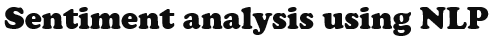

## Project Requirement for Sentiment analysis using NLP:

In this project milestone, you will be accomplishing task 2 of the project, here you will perform Natural Language Understanding, Extraction and Sentiment anlaysis.

Natural language understanding: Converts a large set of text into more formal representations , such as first-order logic structure that are easier for the computer programs to mainpulate notations.

Information Extraction: Extract Strutured information from Unstructed information:

Sentiment Analysis: Analyze the attitude or emotional state of customers of their posted review texts.


### Adding the New column for the data

This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment

In [39]:
final_music_df.insert(13,'overall_sentiment',np.nan)

In [40]:
final_music_df.loc[final_music_df['overall'] == 3,'overall_sentiment']='neutral'
final_music_df.loc[final_music_df['overall'] > 3,'overall_sentiment']='positive'
final_music_df.loc[final_music_df['overall'] < 3,'overall_sentiment']='negative'

In [41]:
final_music_df.shape

(152264, 14)

## VADER

* VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
* VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.
* For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

In [42]:
# Getting the polarity of reviewText 
res2 = {}
t = 0
for i, row in tqdm(final_music_df.iterrows(), total=len(final_music_df)):
    text = row['text']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/152264 [00:00<?, ?it/s]

In [43]:
# Transposing the dataframe
j = pd.DataFrame(res2).T
j

,neg,neu,pos,compound
0,0.000,0.770,0.230,0.5840
1,0.000,0.400,0.600,0.6696
2,0.000,0.556,0.444,0.6114
3,0.000,0.328,0.672,0.6249
4,0.145,0.791,0.063,-0.4777
...,...,...,...,...
152259,0.057,0.802,0.141,0.5001
152260,0.000,0.815,0.185,0.8550
152261,0.000,0.655,0.345,0.8173
152262,0.017,0.808,0.176,0.9514


In [44]:
j.isnull().sum()

neg         0
neu         0
pos         0
compound    0
dtype: int64

In [46]:
final_music_df.reset_index(drop=True, inplace=True)

In [47]:
# concating the main data and the Polarity Scores
final_music_df= pd.concat([final_music_df, j], axis = 1)

In [48]:
final_music_df

,overall,verified,reviewTime,reviewerID,reviewerName,category,description,title,brand,feature,main_cat,price,text,overall_sentiment,neg,neu,pos,compound
0,5,False,2007-02-14,A20DOQGG34SKR5,Richard A. Wall,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,The expression of Journey's music comes out ve...,positive,0.000,0.770,0.230,0.5840
1,5,True,2014-12-14,A2XVOIUQFKHGX7,Leah N,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,Love it! Five Stars,positive,0.000,0.400,0.600,0.6696
2,5,True,2014-10-15,A3EYX1Z1RVJQ8T,Annetta Allred,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,My daughter loves it! Five Stars,positive,0.000,0.556,0.444,0.6114
3,5,True,2014-09-29,AM4HSLYN8E3SN,notsofast,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,Great Five Stars,positive,0.000,0.328,0.672,0.6249
4,3,True,2014-02-07,A32GLSH2IC98Q3,Stela Pen,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,I expected something more elaborated. The musi...,neutral,0.145,0.791,0.063,-0.4777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152259,3,False,2010-10-27,A3LO69NVX14T5O,I. Pribadi,Musical Instruments Instrument Accessories Dr...,The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,One quick and easy application 8 fl Oz 250 ml...,Musical Instruments,13.30,Product works like decribed but does require s...,neutral,0.057,0.802,0.141,0.5001
152260,5,True,2010-03-26,A23BA3FL30O87V,Andrew Williams,Musical Instruments Instrument Accessories Dr...,The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,One quick and easy application 8 fl Oz 250 ml...,Musical Instruments,13.30,Product works very well. I have Zildjian A Cu...,positive,0.000,0.815,0.185,0.8550
152261,5,True,2009-06-21,AC6ZMS9HZ23I7,hd,Musical Instruments Instrument Accessories Dr...,The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,One quick and easy application 8 fl Oz 250 ml...,Musical Instruments,13.30,the product works very well. the supplier sen...,positive,0.000,0.655,0.345,0.8173
152262,5,False,2008-08-29,A3ASBJX2ZUZZ2J,Music Lover,Musical Instruments Instrument Accessories Dr...,The Zildjian Cymbal Cleaning Polish is specia...,Zildjian Brilliant Finish Cymbal Polish,Avedis Zildjian Company,One quick and easy application 8 fl Oz 250 ml...,Musical Instruments,13.30,"This polish is really good, I have ZHT Pros. I...",positive,0.017,0.808,0.176,0.9514


In [49]:
final_music_df.shape

(152264, 18)

In [50]:
final_music_df.isnull().sum()

overall              0
verified             0
reviewTime           0
reviewerID           0
reviewerName         0
category             0
description          0
title                0
brand                0
feature              0
main_cat             0
price                0
text                 0
overall_sentiment    0
neg                  0
neu                  0
pos                  0
compound             0
dtype: int64

In [51]:
# Creating the Class column based on compound column
final_music_df.insert(1, 'sentiment', np.nan)
final_music_df.loc[final_music_df['compound']>=0.05, 'sentiment'] = 'positive'
final_music_df.loc[final_music_df['compound']<=-0.05, 'sentiment'] = 'negative'
final_music_df.loc[((final_music_df['compound'] > -0.05) & (final_music_df['compound'] < 0.05)), 'sentiment'] = 'neutral'

In [52]:
final_music_df.head(3)

,overall,sentiment,verified,reviewTime,reviewerID,reviewerName,category,description,title,brand,feature,main_cat,price,text,overall_sentiment,neg,neu,pos,compound
0,5,positive,False,2007-02-14,A20DOQGG34SKR5,Richard A. Wall,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,The expression of Journey's music comes out ve...,positive,0.0,0.770,0.230,0.5840
1,5,positive,True,2014-12-14,A2XVOIUQFKHGX7,Leah N,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,Love it! Five Stars,positive,0.0,0.400,0.600,0.6696
2,5,positive,True,2014-10-15,A3EYX1Z1RVJQ8T,Annetta Allred,Musical Instruments Instrument Accessories,Journey defined 80s rock Their signature song...,Journey - Greatest Hits: Easy Piano,Alfred Music,Category Piano Personality Book Format Book I...,Musical Instruments,17.78,My daughter loves it! Five Stars,positive,0.0,0.556,0.444,0.6114


## Conclusion of VADER sentiment:

VADER (Valence Aware Dictionary for Sentiment Reasoning) is a powerful model used for text sentiment analysis that takes into account both polarity (positive/negative) and intensity (strength) of emotion. In this approach, we are using VADER sentiment analysis to analyze the sentiment of Amazon product reviews.

To get started, we call the sentiment intensity analyzer provided by the VADER model and fit the data to it. This step results in a polarity score for each row in the data, indicating the sentiment polarity of that particular review.

Next, we calculate the compound score for each review by summing up the intensity of each word in the text. This score ranges from -1 to 1 and indicates the overall sentiment of the review.

We then add a new column "SENTIMENT" to the existing dataframe, where each review is classified as either positive, negative or neutral. If the compound score is greater than or equal to 0.05, it is considered as a positive review. Conversely, if the compound score is less than or equal to -0.05, it is considered as a negative review. If the compound score falls between -0.05 to 0.05, it is considered as a neutral review.

This approach to sentiment analysis can be helpful in gaining insights into the sentiment of Amazon product reviews, which in turn can aid in making informed decisions regarding product improvements or marketing strategies. By understanding the sentiment of customer reviews, businesses can address the concerns of their customers and enhance their product offerings, ultimately leading to greater customer satisfaction and loyalty.





### Downloading the Updated datafile 

In [53]:
#final_music_df.to_csv("Final_Musical_File.csv",index=False)

### Load the Updated dataset

In [58]:
final_music_df = pd.read_csv('/content/drive/MyDrive/Final_Musical_File.csv')

## Building a NLP Model using Multinominal naive bayes :

In [59]:
X = final_music_df['text']
y = final_music_df['sentiment']

In [60]:
def model_multinomial(X,y):
    xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=13)
    TFIDF = TfidfVectorizer(stop_words=stopwords.words('english'))
    xtrain=TFIDF.fit_transform(xtrain)
    xtest=TFIDF.transform(xtest)
    model=MultinomialNB()
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    matrix=confusion_matrix(ypred,ytest)
    report=classification_report(ytest, ypred)
    table=pd.DataFrame({'Ypred':ypred,'Ytest':ytest})
    return report,matrix,table

In [61]:
report,matrix,table=model_multinomial(X,y)
print('Report')
print(report)

print('Confusion Matrix')

print()
print(matrix)

print()
print('Classification report')

table[:30]

Report
              precision    recall  f1-score   support

    negative       0.97      0.01      0.02      3398
     neutral       0.67      0.02      0.04      2569
    positive       0.85      1.00      0.92     32099

    accuracy                           0.85     38066
   macro avg       0.83      0.34      0.33     38066
weighted avg       0.84      0.85      0.78     38066

Confusion Matrix

[[   31     1     0]
 [   11    57    17]
 [ 3356  2511 32082]]

Classification report


,Ypred,Ytest
112753,positive,negative
44635,positive,negative
131812,positive,positive
136247,positive,neutral
96180,positive,positive
22108,positive,positive
122388,positive,positive
120431,positive,positive
48235,positive,positive
75244,positive,positive


## Building a NLP Model using OVR Classifier :

In [62]:
def model_OVRclassifier(X,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
    le = LabelEncoder()
    x_train = vectorizer.fit_transform(x_train)
    x_test = vectorizer.transform(x_test)
    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_test)
    
    lr = LogisticRegression(max_iter=200,verbose=1)
    ovr = OneVsRestClassifier(lr)
    ovr.fit(x_train,y_train)
    y_pred = ovr.predict(x_test)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    table1=pd.DataFrame({'Ypred':y_pred,'Ytest':y_test})
    return report,matrix,table1

In [63]:
report,matrix,table1=model_OVRclassifier(X,y)
print('Report')
print(report)

print('Confusion Matrix')

print()
print(matrix)

print()
print('Classification report')

table1[:30]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Report
              precision    recall  f1-score   support

           0       0.81      0.45      0.58      2749
           1       0.90      0.67      0.76      2024
           2       0.93      0.99      0.96     25680

    accuracy                           0.92     30453
   macro avg       0.88      0.70      0.77     30453
weighted avg       0.91      0.92      0.91     30453

Confusion Matrix

[[ 1237    98  1414]
 [   81  1346   597]
 [  218    58 25404]]

Classification report


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s finished


,Ypred,Ytest
0,2,2
1,2,2
2,2,2
3,2,2
4,0,2
5,2,2
6,1,1
7,0,0
8,2,2
9,2,2


## Conclusion of Sentiment analysis using NLP:

The primary objective of this project was to build an NLP model capable of performing sentiment analysis on product reviews. The task required us to choose two columns from the dataset, "Text" and "Sentiment," and develop the model using two different algorithms: MultinomialNB and OVR (logistic regression).

To preprocess the textual data, we used the NLTK stop words to remove common words that do not add any significant value to the analysis. We then split the data into train and test sets using the train_test_split function, which is a common method for evaluating machine learning models.

For the MultinomialNB model, we first transformed the textual data into a numerical format using the TF-IDF vectorizer. We then created a user-defined function to build the model, which was then fitted using the x_train and y_train data. To evaluate the model, we used the classification report and confusion matrix, which provided insights into the precision, recall, F1-score, and support values of the model. The accuracy score for the MultinomialNB model was 85%, which indicates that the model performed relatively well in predicting the sentiment of product reviews.

Similarly, for the OVR model, we used logistic regression with max_iter = 200 to build the model. The OVR model was then fitted using the x_train and y_train data, and tested using x_test. We evaluated the model using the classification report and confusion matrix, and the accuracy score for the OVR model was 92%, which is considered excellent.

Based on our analysis, we can conclude that the OVR model with logistic regression performed the best among the two models tested for this task. This model provided higher accuracy in predicting the sentiment of product reviews, indicating that it is more reliable in determining the positive, negative, or neutral sentiment of the reviews. Overall, the results of this project demonstrate the effectiveness of NLP models in performing sentiment analysis of product reviews.



---



---



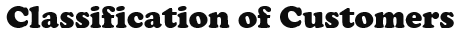

## Project requierment of Classification of data:

Classification: The company would like to understand who would be the most likely customers to purchase a product in the future or to recommend their brand, as well as what would be the key purchase drivers that affect people's decision to purchase or recommend.

### Building a classification model for review analysis

In [64]:
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier

In [65]:
X = final_music_df['text']
y = final_music_df['sentiment']

In [66]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

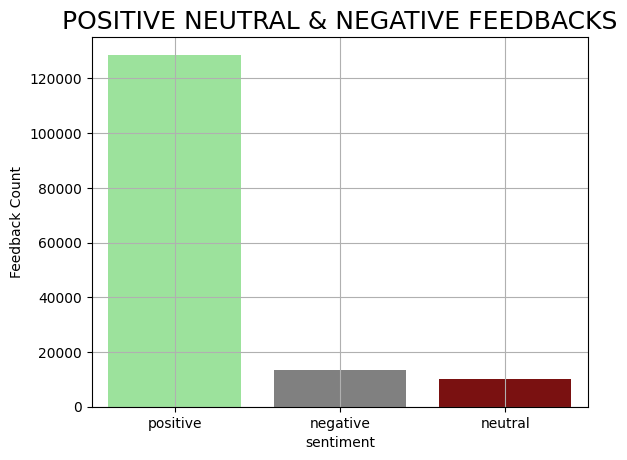

In [67]:
pos_neg_color = ['lightgreen','gray','darkred']
sns.countplot(data=final_music_df, x='sentiment',palette= pos_neg_color)
plt.title('POSITIVE NEUTRAL & NEGATIVE FEEDBACKS', size=18)
plt.ylabel('Feedback Count')
plt.grid()
plt.show()

In [68]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X,y)

In [69]:
# Counting Target Variable
y_smote.value_counts()

positive    128652
negative    128652
neutral     128652
Name: sentiment, dtype: int64

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size= 0.3, random_state = 1)

print('X_train shape ', X_train.shape)
print('y_train shape ', y_train.shape)
print('X_test shape ', X_test.shape)
print('y_test shape ', y_test.shape)

X_train shape  (270169, 54707)
y_train shape  (270169,)
X_test shape  (115787, 54707)
y_test shape  (115787,)


In [71]:
#Creating Classifier
logistic_regression = LogisticRegressionCV(random_state= 1, verbose= 1) 

#Fitting Model
logistic_regression.fit(X_train,y_train)

#Prediction
prediction = logistic_regression.predict(X_test)

#Model Accuracy
#print('LOGISTIC REGRESSION')
#plot_confusion_matrix(logistic_regression, X_test, y_test)  
#plt.show()

print()
print('Classification Report')
print(classification_report(y_test, prediction))
print('Model Accuracy: ',accuracy_score(y_test,prediction))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 10.5min finished



Classification Report
              precision    recall  f1-score   support

    negative       0.91      0.94      0.93     38603
     neutral       0.95      0.96      0.95     38634
    positive       0.92      0.87      0.90     38550

    accuracy                           0.93    115787
   macro avg       0.93      0.93      0.93    115787
weighted avg       0.93      0.93      0.93    115787

Model Accuracy:  0.9263475174242359


In [72]:
# Checking Predictions with random reviews
test_set = ['very bad, didn´t like, horrible, disappointed, disappointing', #Negative Comment
            'very good, nice, awesome, great, amazing', # Positive Comment
            'fine, average, as expected, normal, ordinary'] # Neutral Comment  

# fitting TF-IDF
new_test = vectorizer.transform(test_set)
          

print('Logistic Regression prediction',logistic_regression.predict(new_test))

Logistic Regression prediction ['negative' 'positive' 'neutral']


### random forest classifier

In [73]:
random_forest_classifier = RandomForestClassifier(random_state=1, n_estimators=5,verbose=1)
random_forest_classifier.fit(X_train, y_train)

#Prediction
random_prediction = random_forest_classifier.predict(X_test)

#Model Accuracy
#print('RANDOM FOREST CLASSIFIER')
#plot_confusion_matrix(random_forest_classifier, X_test, y_test)  
#plt.show() 

print()
print('Classification Report')
print(classification_report(y_test, random_prediction))
print('Model Accuracy: ',accuracy_score(y_test, random_prediction))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished



Classification Report
              precision    recall  f1-score   support

    negative       0.89      0.95      0.92     38603
     neutral       0.95      0.98      0.97     38634
    positive       0.95      0.85      0.90     38550

    accuracy                           0.93    115787
   macro avg       0.93      0.93      0.93    115787
weighted avg       0.93      0.93      0.93    115787

Model Accuracy:  0.9291630321193225


In [74]:
# Checking Predictions with random reviews
test_set = ['very bad, didn´t like, horrible, disappointed, disappointing', #Negative Comment
            'very good, nice, awesome, great, amazing', # Positive Comment
            'fine, average, as expected, normal, ordinary'] # Neutral Comment  

# fitting TF-IDF
new_test = vectorizer.transform(test_set)
          

print('Random forest classifier prediction',random_forest_classifier.predict(new_test))

Random forest classifier prediction ['negative' 'positive' 'positive']


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
X = final_music_df['text'] # Features
y = final_music_df['overall'] 

In [77]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
y_pred = knn.predict(X_test)

In [81]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7449840738186714


### Decision Tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [84]:
y_pred = decision_tree.predict(X_test)

In [85]:
decision_tree_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Decision Tree classifier:", decision_tree_accuracy)

Accuracy of Decision Tree classifier: 0.7213739204676058


# Conclusion of Classification:

The objective of this project is to build a classification model that can help the company identify potential customers who are likely to make purchases in the future or recommend the brand to others. The classification model will be built using two columns: "Text" (reviews) and "Sentiment". Four classification models were considered for this task: Logistic Regression, Random Forest Classifier, KNN, and Decision Tree Classifier.

To prepare the data for modeling, the "Text" column was encoded using the TF-IDF vectorizer to convert it into a numerical format that can be understood by the machine. The SMOTE function was used to balance the classes of the target variable. The data was then split into training and testing sets using the train-test-split function in a 70:30 ratio.

The first model built was Logistic Regression. The model was trained using the X_train and y_train data and then tested using X_test. The performance of the model was evaluated using classification report and accuracy score. The accuracy performance of the model was 92%, which is considered best.

The second model built was the Random Forest Classifier. The model was trained with n_estimators=5 using X_train and y_train and then tested using X_test. The performance of the model was evaluated using classification report and accuracy score. The accuracy performance of the model was 92%, which is considered the best among the four models tested.

The KNN model was built next. Before building the KNN model, the countvectorizer was used to encode the "Text" column. The KNN model was trained with n_neighbors=5 using X_train and y_train and then tested using X_test. The performance of the model was evaluated using classification report and accuracy score. The accuracy performance of the model was 74%, which is considered average.

The Decision Tree Classifier model was the last model built. The model was trained using X_train and y_train and then tested using X_test. The performance of the model was evaluated using classification report and accuracy score. The accuracy performance of the model was 72%, which is considered average.

In conclusion, the Random Forest Classifier model performed the best with an accuracy of 92%. Logistic Regression also performed best with an accuracy of 92%. The models were also tested on additional reviews and predicted well. Therefore, Both models Random Forest Classifier model,Logistic Regression model can be used to classify potential customers effectively.



---



---



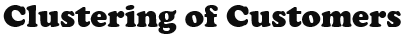

## Project requirement for Clustering Customers:

Building a clustering model to characterize and discover the customers segments for marketing purposes.

## Building a clustering model:

For building a clustering model now we are doing PCA(Principal Component Analysis) To reduce the Dimensionality.

In [86]:
final_music_df.columns

Index(['overall', 'sentiment', 'verified', 'reviewTime', 'reviewerID',
       'reviewerName', 'category', 'description', 'title', 'brand', 'feature',
       'main_cat', 'price', 'text', 'overall_sentiment', 'neg', 'neu', 'pos',
       'compound'],
      dtype='object')

In [100]:
components = final_music_df[['text','sentiment','compound','overall','reviewerID','reviewerName','category', 'description', 'title', 'brand']]

In [101]:
le = LabelEncoder()
components = components.apply(le.fit_transform)
components.head()

,text,sentiment,compound,overall,reviewerID,reviewerName,category,description,title,brand
0,96317,2,7749,4,32711,61997,139,658,900,10
1,71893,2,8435,4,63016,44629,139,658,900,10
2,75312,2,7961,4,78319,4532,139,658,900,10
3,25543,2,8070,4,110364,89995,139,658,900,10
4,41306,0,2937,2,67182,69473,139,658,900,10


In [89]:
scaler = StandardScaler()
X = scaler.fit_transform(components)
X

array([[ 0.56514762, -0.28911694,  0.53483996, ..., -0.39549299,
         0.04443639, -1.58428171],
       [-0.01393737, -0.03627903,  0.53483996, ..., -0.39549299,
         0.04443639, -1.58428171],
       [ 0.06712599, -0.21098044,  0.53483996, ..., -0.39549299,
         0.04443639, -1.58428171],
       ...,
       [ 1.61617359,  0.47566246,  0.53483996, ...,  1.09092813,
         1.99406842, -1.42601786],
       [ 0.99415039,  0.96880696,  0.53483996, ...,  1.09092813,
         1.99406842, -1.42601786],
       [-0.2555152 , -0.44280996,  0.53483996, ...,  1.09092813,
         1.99406842, -1.42601786]])

In [90]:
pca_music=PCA(n_components=2)

In [91]:
pc_music=pca_music.fit_transform(X)

In [92]:
pc_music_df=pd.DataFrame(pc_music,columns=['PC1','PC2'])
pc_music_df

,PC1,PC2
0,-1.039058,-0.247027
1,-1.033782,-0.531232
2,-1.036470,-0.432555
3,-1.061368,-0.576664
4,-1.223731,2.064972
...,...,...
152259,0.767550,1.261600
152260,0.896538,-0.799468
152261,0.910942,-0.465335
152262,0.924572,-0.920565


### Building Kmeans Clustering:

Using Elbow method:

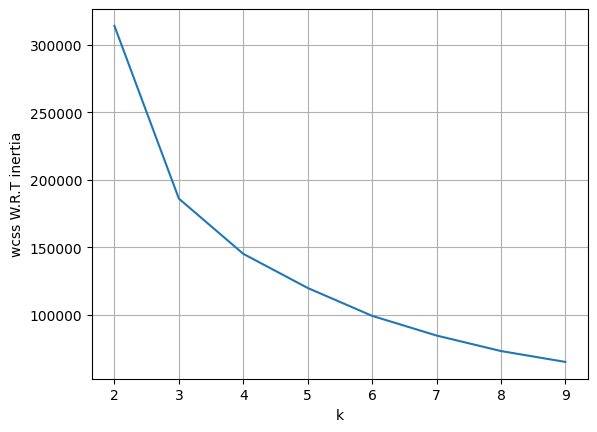

In [95]:
wcss=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(pc_music_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,10),wcss)
plt.grid(True)
plt.xlabel('k')
plt.ylabel('wcss W.R.T inertia')
plt.show()

### Using Silhouette score:

In [96]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,6)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pc_music_df)
    silhouette_avg = silhouette_score(pc_music_df, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.40222388073352583
For n_clusters = 3 The average silhouette_score is : 0.4549775266342147
For n_clusters = 4 The average silhouette_score is : 0.3687223480169108
For n_clusters = 5 The average silhouette_score is : 0.3697771790275116


In [97]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,6)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.15973778847890135
For n_clusters = 3 The average silhouette_score is : 0.17046851235378638
For n_clusters = 4 The average silhouette_score is : 0.1262099221365537
For n_clusters = 5 The average silhouette_score is : 0.12246353913095642


In [98]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,8)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(components)
    silhouette_avg = silhouette_score(components, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.3113819653301308
For n_clusters = 3 The average silhouette_score is : 0.286560955655262
For n_clusters = 4 The average silhouette_score is : 0.2793729751983941
For n_clusters = 5 The average silhouette_score is : 0.27695984989290867
For n_clusters = 6 The average silhouette_score is : 0.27613103275466716
For n_clusters = 7 The average silhouette_score is : 0.270159952590438


In [102]:
comp = components[['text','sentiment']]
comp.head()

,text,sentiment
0,96317,2
1,71893,2
2,75312,2
3,25543,2
4,41306,0


In [103]:
y = scaler.fit_transform(comp)

In [104]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,6)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(y)
    silhouette_avg = silhouette_score(y, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5845721697395514
For n_clusters = 3 The average silhouette_score is : 0.5861585006276926
For n_clusters = 4 The average silhouette_score is : 0.5351139042888772
For n_clusters = 5 The average silhouette_score is : 0.5578167307574159


In [105]:
comp = components[['text','sentiment','category','reviewerID']]
comp.head()

,text,sentiment,category,reviewerID
0,96317,2,139,32711
1,71893,2,139,63016
2,75312,2,139,78319
3,25543,2,139,110364
4,41306,0,139,67182


In [106]:
y = scaler.fit_transform(comp)

In [107]:
range_n_clusters = range(2,6)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(y)
    silhouette_avg = silhouette_score(y, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.20641433187551728
For n_clusters = 3 The average silhouette_score is : 0.24797254992094003
For n_clusters = 4 The average silhouette_score is : 0.24337007611818198
For n_clusters = 5 The average silhouette_score is : 0.25497124645411556


Now after finding the best silhouette score with best k value.

### Building the model with Best K value:

In [139]:
X = pc_music_df.values

In [140]:
kmeans =KMeans(n_clusters=3)

In [141]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [142]:
labels=kmeans.fit_predict(X)
labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

### Visualization:

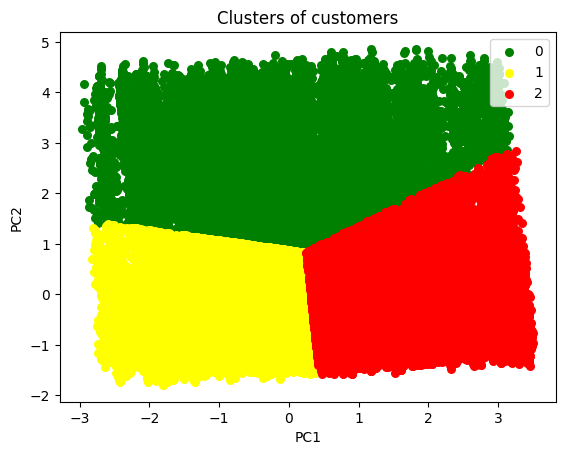

Silhouette Coefficient: 0.455


In [143]:
plt.scatter(X[labels== 0,0], X[labels == 0, 1], s = 30, c = 'green', label = '0')
plt.scatter(X[labels == 1,0],X[labels == 1, 1], s = 30, c = 'yellow', label = '1')
plt.scatter(X[labels == 2,0],X[labels == 2, 1], s = 30, c = 'red', label = '2')

plt.title('Clusters of customers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# Conclusion of Clustering Customers:

The main objective of this task was to develop a clustering model that can accurately characterize and discover different customer segments for marketing purposes. After careful consideration of various clustering algorithms, we decided to use the K-means clustering model for this task.

However, the data we were working with was not very informative and did not provide direct insights for clustering. Therefore, we opted to use Principal Component Analysis (PCA) to extract only useful information from the data. We performed Label Encoding for the entire data and standardized the data using StandardScaler before creating a separate dataframe of PCA.

To determine the appropriate number of clusters (K-value) for the K-means model, we initially attempted to use the "Elbow Method." However, the results of this method were difficult to interpret. Consequently, we decided to use the "Silhouette Score" to identify the optimal K-value for the clustering. After testing different K-values, we found that K=3 provided the best silhouette score.

We also attempted to identify any other useful columns by performing the "Silhouette Score" analysis with different columns. However, we found that the K-value obtained using PCA provided the best results.

We then built the K-means model by fitting the PCA data and setting the n_cluster parameter as 3. Once the model was built, we predicted the labels for the data and performed a visualization to demonstrate how the customers are segmented.

Finally, we evaluated the model using the silhouette score and found that it performed well, achieving a score of 45%. This result indicates that the model can accurately characterize and discover different customer segments for marketing purposes. In the visualization of the customer segments, we can clearly see positive, negative, and neutral customers, providing valuable insights for marketing strategies.



---



---



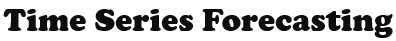

## Project requirement for sentiment forecasting:

* In this project milestone, you will be accomplishing task 4 of the project, here you will perform customer sentiment time series forecasting.
* Sentiment time series forecasting: Combining time series analysis with natural language processing, we are able to show how the sentiment of unstructured text data changes over time, as well as used it to predict future data trends.

### Building Time Series model for forecasting Ratings :

In [144]:
data = final_music_df[['reviewTime','overall']]
data.head()

,reviewTime,overall
0,2007-02-14,5
1,2014-12-14,5
2,2014-10-15,5
3,2014-09-29,5
4,2014-02-07,3


In [145]:
data['reviewTime'] = pd.to_datetime(data['reviewTime'], format='%Y-%m-%d')

In [146]:
data.set_index('reviewTime', inplace=True)
data.head()

,overall
reviewTime,
2007-02-14,5
2014-12-14,5
2014-10-15,5
2014-09-29,5
2014-02-07,3


In [147]:
data = data.resample('M').mean()

In [148]:
data = data.sort_index()
data.head()

,overall
reviewTime,
2000-11-30,5.0
2000-12-31,NaN
2001-01-31,NaN
2001-02-28,NaN
2001-03-31,NaN


In [149]:
data.dropna(inplace = True)

### Visualization of the data:

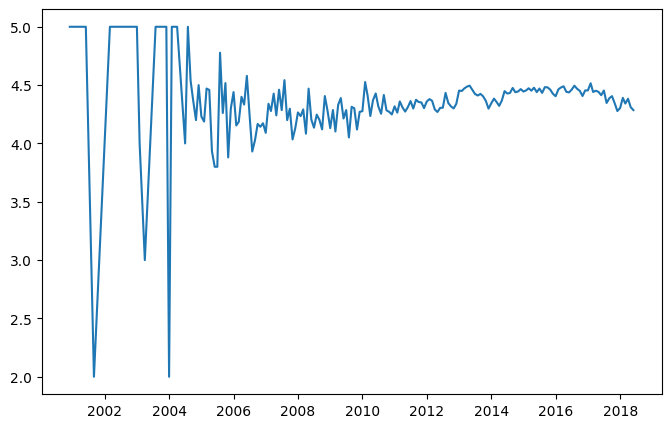

In [150]:
plt.figure(figsize=(8,5))
plt.plot(data);

### Checking all Time series components:

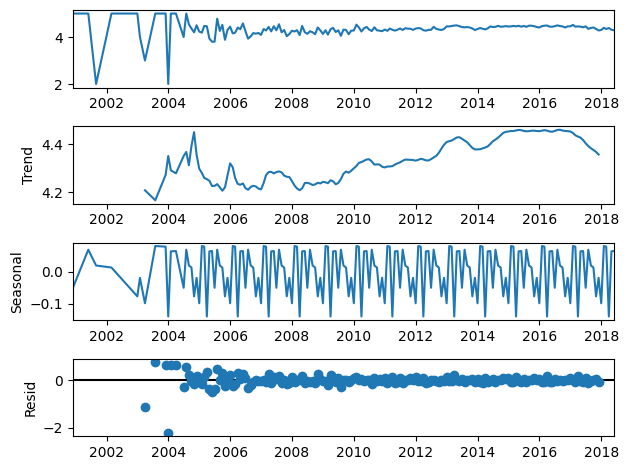

In [151]:
decomposition = seasonal_decompose(data,period = 12)
decomposition.plot();

## Stationary check:

In [152]:
from statsmodels.tsa.stattools import adfuller
def checkStationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [153]:
# Using AD-fuller test we are checking whether the data is stationary or not.
checkStationarity(data)

0.7535020803824096


'pvalue=0.7535020803824096. Data is not Stationary. Make the data stationary before model building'

In [154]:
# Assigning same data to another variable to find the shift difference value.
dummy_data = data.copy()

In [155]:
dummy_data

,overall
reviewTime,
2000-11-30,5.000000
2001-05-31,5.000000
2001-08-31,2.000000
2002-02-28,5.000000
2002-12-31,5.000000
...,...
2018-01-31,4.390769
2018-02-28,4.341889
2018-03-31,4.383130


## Using Differencing method to find the D value :

In [156]:
dummy_data['diff_1'] = diff(dummy_data['overall'],k_diff = 1)
dummy_data.head()

,overall,diff_1
reviewTime,,
2000-11-30,5.0,NaN
2001-05-31,5.0,0.0
2001-08-31,2.0,-3.0
2002-02-28,5.0,3.0
2002-12-31,5.0,0.0


In [157]:
# Again Stationarity check
checkStationarity(dummy_data['diff_1'].dropna())

4.313750006622781e-18


'pvalue=4.313750006622781e-18. Data is Stationary. Proceed to model building'

By one differencing only the data became stationary.
So the **D value = 1.**

### Plot ACF and PACF 

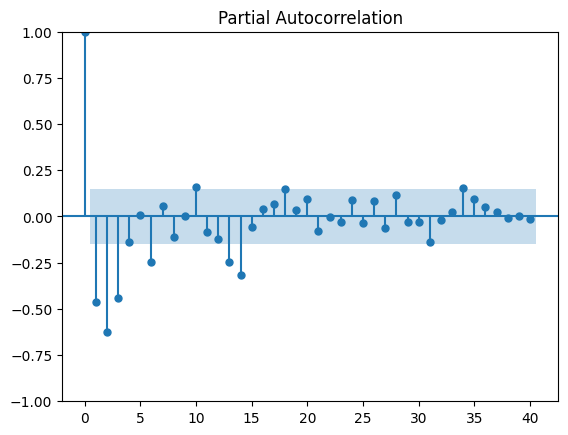

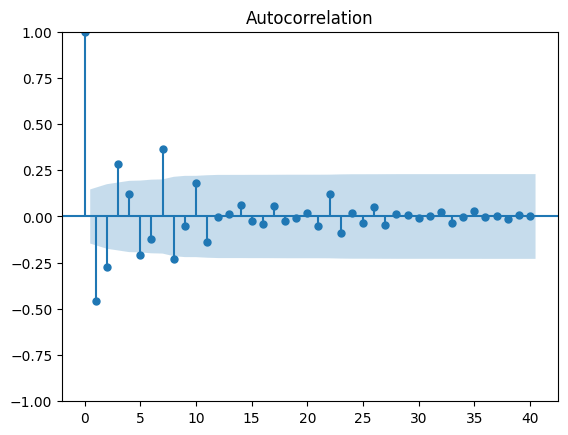

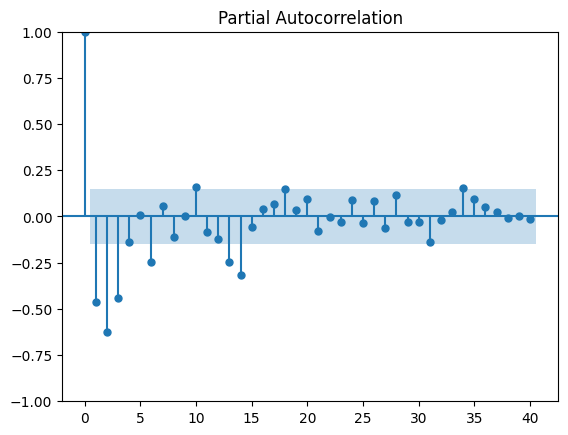

In [158]:
plot_acf(dummy_data['diff_1'].dropna(),lags=40)
plot_pacf(dummy_data['diff_1'].dropna(),lags=40)

Adjusting the values of P and Q to get the most accurate model.

* From ACF =  q value = 6[0,1,2,3,4,5,6]
* From PACF = p value = 6[0,1,2,3,4,5,6]
* From ACF = Q value = 2[0,1,2]
* From PACF = P value = 2[0,1,2]
* Difference level = d value = 1

### Finding the Best Hyperparameters for SARIMA:

In [159]:
p=4;q=6;d=1;
for i in range(0,3):
    for j in range(0,3):
        sar=sm.tsa.statespace.SARIMAX(data,order=(p,d,q),seasonal_order=(i,1,j,24)).fit()
        print(sar.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             overall   No. Observations:                  180
Model:             SARIMAX(4, 1, 6)x(0, 1, [], 24)   Log Likelihood                 -25.067
Date:                             Tue, 04 Apr 2023   AIC                             72.134
Time:                                     11:18:28   BIC                            105.612
Sample:                                          0   HQIC                            85.732
                                             - 180                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2475      0.096    -12.997      0.000      -1.436      -1.059
ar.L2         -1.5944      

### Parameters for SARIMA Model:

* p=0;q=0;d=1;
* P=0;Q=0;D=1;  
* AIC -> 269.128
-------------------------------------------
* p=0;q=1;d=1;
* P=0;Q=0;D=1;   
* AIC -> 151.521
-------------------------------------------
* p=0;q=2;d=1;
* P=0;Q=0;D=1;   
* AIC -> 142.737
-------------------------------------------
* p=0;q=3;d=1;
* P=0;Q=0;D=1;   
* AIC -> 139.241
-------------------------------------------
* p=0;q=4;d=1;
* P=0;Q=0;D=1;   
* AIC -> 101.632
-------------------------------------------
In the same way finding Some of the Best p,q,P,Q values with help of AIC.
-------------------------------------------
* p=6;q=6;d=1;
* P=0;Q=1;D=1;   
* AIC -> 58.923
-------------------------------------------
* p=6;q=6;d=1;
* P=2;Q=0;D=1;   
* AIC -> 59.335
-------------------------------------------
* p=6;q=6;d=1;
* P=0;Q=2;D=1;   
* AIC -> 59.823 
-------------------------------------------
* p=5;q=6;d=1;
* P=0;Q=1;D=1;   
* AIC -> 67.037
-------------------------------------------
* p=5;q=6;d=1;
* P=1;Q=0;D=1;  
* AIC -> 67.218
-------------------------------------------

### Building the SARIMA Model:

In [160]:
t=int(len(data)*0.7)
train=data[:t]
test=data[t:]
print(len(train))
print(len(test))

125
55


In [174]:
p=6;q=6;d=1;
P=0;Q=1;D=1;
sarima=sm.tsa.statespace.SARIMAX(data,order=(p,d,q),seasonal_order=(P,D,Q,24)).fit()
print(sarima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              overall   No. Observations:                  180
Model:             SARIMAX(6, 1, 6)x(0, 1, [1], 24)   Log Likelihood                 -15.461
Date:                              Tue, 04 Apr 2023   AIC                             58.923
Time:                                      11:25:43   BIC                            101.531
Sample:                                           0   HQIC                            76.229
                                              - 180                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0771      0.098    -10.983      0.000      -1.269      -0.885
ar.L2         -1.09

### Predicting the Rating of reviews

In [175]:
predicted=sarima.predict(start=len(train),end=len(train)+54)
predicted

reviewTime
2013-11-30    4.363131
2013-12-31    4.259039
2014-01-31    4.440845
2014-02-28    4.423798
2014-03-31    4.319469
2014-04-30    4.389385
2014-05-31    4.421236
2014-06-30    4.334353
2014-07-31    4.389754
2014-08-31    4.383665
2014-09-30    4.307149
2014-10-31    4.391219
2014-11-30    4.295592
2014-12-31    4.381486
2015-01-31    4.433044
2015-02-28    4.386728
2015-03-31    4.531438
2015-04-30    4.419646
2015-05-31    4.397198
2015-06-30    4.436577
2015-07-31    4.393495
2015-08-31    4.439801
2015-09-30    4.473223
2015-10-31    4.302916
2015-11-30    4.366024
2015-12-31    4.304719
2016-01-31    4.497574
2016-02-29    4.464376
2016-03-31    4.319369
2016-04-30    4.351628
2016-05-31    4.409619
2016-06-30    4.511026
2016-07-31    4.520264
2016-08-31    4.440936
2016-09-30    4.356540
2016-10-31    4.451730
2016-11-30    4.459332
2016-12-31    4.525024
2017-01-31    4.509552
2017-02-28    4.456082
2017-03-31    4.480307
2017-04-30    4.543624
2017-05-31    4.475082


### Forecasting the Rating of reviews

In [176]:
fcast=sarima.predict(start=len(data),end=len(data)+30)
fcast

180    4.568496
181    4.516161
182    4.400006
183    4.493137
184    4.556530
185    4.453454
186    4.387017
187    4.602348
188    4.473411
189    4.446977
190    4.562441
191    4.476177
192    4.484080
193    4.404648
194    4.489415
195    4.475385
196    4.380865
197    4.437936
198    4.378268
199    4.459514
200    4.455848
201    4.423744
202    4.431758
203    4.392135
204    4.578121
205    4.538193
206    4.456374
207    4.538613
208    4.506816
209    4.508206
210    4.464898
Name: predicted_mean, dtype: float64

In [177]:
forecast_dates = pd.date_range(start=data.index[-1], periods=len(fcast)+1, freq='M')[1:]

# Set the DateTimeIndex as the index of the forecast DataFrame
fcast.index = forecast_dates

# Now you can access the index of the forecast DataFrame as a DateTimeIndex
print(fcast.index)

DatetimeIndex(['2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
               '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')


### Visualizing Actual ,predcited and forecasted

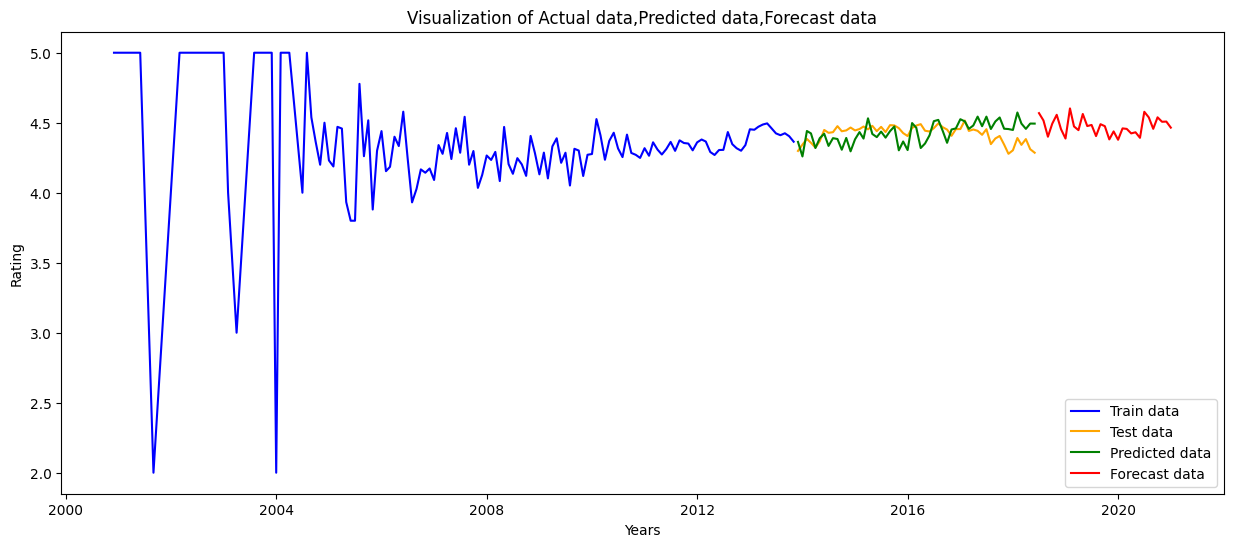

In [178]:
fig,ax = plt.subplots(figsize=(15,6))
plt.plot(train,c = 'blue', label = 'Train data')
plt.plot(test,c = 'orange', label = 'Test data')
plt.plot(predicted,c = 'green', label = 'Predicted data')
plt.plot(fcast,c = 'red', label = 'Forecast data')
plt.title('Visualization of Actual data,Predicted data,Forecast data')
plt.xlabel('Years')
plt.ylabel('Rating')
plt.legend()
plt.show()

### Evaluation of SARIMA model:

In [179]:
test1 = round(test,1)
predicted1 = round(predicted,1)

In [180]:
mse=mean_squared_error(test1,predicted1)
print('MSE :',mse)
print('RMSE:',np.sqrt(mse))

MSE : 0.010909090909090905
RMSE: 0.10444659357341868


### Conclusion of Review forecasting using SARIMA Model:

The main objective of this task was to build a robust Time Series model that could accurately forecast product ratings over time. In order to achieve this goal, we first selected two important columns from the dataset, namely "ReviewTime" and "Overall". We then performed various preprocessing steps to ensure that the data was in a suitable format for time series forecasting.

These preprocessing steps included formatting the "ReviewTime" column into a proper sequence and resampling it on a monthly basis. We also removed any NaN values that could cause issues during the modeling process. Additionally, we explored the components of the data, such as the trend, seasonality, and residuals, to better understand the nature of the data.

To ensure that our model was effective in forecasting the product ratings, we performed a stationarity check on the data. This check revealed that the data was non-stationary, which meant that traditional time series models such as ARIMA might not work effectively. However, we identified the Hybrid model SARIMA as a suitable option for handling non-stationary data with trend and seasonality.

To prepare the data for SARIMA modeling, we used differencing with a shift and a copy of the data to determine the D-value, which we found to be 1. We also plotted the PACF and ACF using a corellogram to identify the p, q, P, and Q values. After experimenting with different p, q, P, and Q values, we identified the top 5 combinations of values that resulted in the lowest AIC (Akaike Information Criterion) value.

Using the best p, q, P, and Q values, we constructed a SARIMA model and trained it on the data. We then used this model to predict values using the test data and forecasted future product ratings. We also created a visualization that displayed the actual, predicted, and forecasted values to gain insight into the model's performance.

Finally, we evaluated the SARIMA model's performance and determined that it performed excellently to the best of our knowledge. This was achieved through careful experimentation and testing of various model configurations to ensure that the model was robust and effective in forecasting product ratings over time.